In [1]:
for (pkg in c("ggplot2", "dplyr", "patchwork")) {
    suppressPackageStartupMessages(
        suppressWarnings(
            library(
                pkg,
                character.only = TRUE,
                quietly = TRUE,
                warn.conflicts = FALSE
            )
        )
    )
}

In [2]:
color_pallete_for_dose <- c(
    "0.0" = "#85FF33",
    "0.61" = "#75FF1A",
    "1.22" = "#62FF00",
    "2.44" = "#4DC507",
    "4.88" = "#398E0B",
    "9.77" = "#265A0C",
    "19.53" = "#132B08",
    "39.06" = "#620B8E",
    "78.13" = "#410C5A",
    "156.25" = "#21082B"
)
font_size <- 24
plot_themes <- (
    theme_bw()
    + theme(
        legend.position = "bottom",
        legend.text = element_text(size = font_size),
        legend.title = element_text(size = font_size),
        axis.title.x = element_text(size = font_size),
        axis.text.x = element_text(size = font_size),
        axis.title.y = element_text(size = font_size),
        axis.text.y = element_text(size = font_size),
        strip.text = element_text(size = font_size -2),
    )
    
    
)

In [3]:
actual_results_file_path <- file.path("../../data/CP_aggregated/endpoints/aggregated_profile.parquet")
actual_results <- arrow::read_parquet(actual_results_file_path)
actual_results$Metadata_Time <- 13
actual_results$shuffled <- "not_shuffled"

# prepend Terminal to each non metadata column name
actual_results <- actual_results %>%
  rename_with(~ paste0("Terminal_", .), -c(Metadata_Time, Metadata_dose, Metadata_Well, shuffled))

columns_to_keep <- colnames(actual_results)



results_file_path <- file.path("../results/all_terminal_features.parquet")
results <- arrow::read_parquet(results_file_path)

subset_results <- results[, colnames(results) %in% columns_to_keep]

In [4]:
unique(results$shuffled)
unique(subset_results$shuffled)

[1] "shuffled"     "not_shuffled"

[1] "shuffled"     "not_shuffled"

In [5]:

# drop the singlecells, compound, and control columns
actual_results <- actual_results %>%
  select(-c(Terminal_Metadata_number_of_singlecells, Terminal_Metadata_plate, Terminal_Metadata_compound, Terminal_Metadata_control))
head(actual_results)

Metadata_Well,Metadata_dose,Metadata_Time,Terminal_Cytoplasm_AreaShape_Area,Terminal_Cytoplasm_AreaShape_BoundingBoxMaximum_Y,Terminal_Cytoplasm_AreaShape_Compactness,Terminal_Cytoplasm_AreaShape_Eccentricity,Terminal_Cytoplasm_AreaShape_Extent,Terminal_Cytoplasm_AreaShape_FormFactor,Terminal_Cytoplasm_AreaShape_MaximumRadius,⋯,Terminal_Nuclei_Texture_Correlation_AnnexinV_3_01_256,Terminal_Nuclei_Texture_Correlation_AnnexinV_3_02_256,Terminal_Nuclei_Texture_Correlation_AnnexinV_3_03_256,Terminal_Nuclei_Texture_Correlation_DNA_3_02_256,Terminal_Nuclei_Texture_DifferenceVariance_AnnexinV_3_01_256,Terminal_Nuclei_Texture_InverseDifferenceMoment_AnnexinV_3_03_256,Terminal_Nuclei_Texture_InverseDifferenceMoment_DNA_3_01_256,Terminal_Nuclei_Texture_SumAverage_AnnexinV_3_00_256,Terminal_Nuclei_Texture_SumAverage_DNA_3_00_256,shuffled
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C-02,0.00,13,-0.1181250,-0.03352885,-0.1948936,0.27708879,-0.05980771,-0.179437479,-0.05384922,⋯,-0.5875429,-0.4401940,-0.4864551,0.6701193,-0.1037723,0.46373199,0.521993,-0.0736818,0.416877,not_shuffled
C-03,0.61,13,-0.3527369,-0.02983171,-0.3429538,0.30139142,0.03686337,0.002814251,-0.18727023,⋯,-0.6486023,-0.7916323,-0.6653327,0.6701193,-0.5268746,0.33255873,0.521993,-0.1213251,0.416877,not_shuffled
C-04,1.22,13,-0.5550591,0.14578251,-0.5069050,0.18486345,0.32415120,0.241012826,-0.34078987,⋯,-0.6486023,-0.8393275,-0.6653327,0.6701193,-0.7746367,-0.01017896,0.521993,-0.1213251,0.416877,not_shuffled
C-05,2.44,13,-0.6836052,0.08108253,-0.5317480,0.07080384,0.27069732,0.280744478,-0.42039627,⋯,-0.6486023,-0.6476671,-0.6653327,0.6701193,-0.5883083,0.16527371,0.521993,-0.1042066,0.416877,not_shuffled
C-06,4.88,13,-0.8722348,-0.01134600,-0.8331915,-0.28715932,0.59677169,0.867524917,-0.43705455,⋯,-0.6486023,-0.6016804,-0.6653327,0.6701193,-0.6627629,0.17555723,0.521993,-0.1087811,0.416877,not_shuffled
C-07,9.77,13,-0.8769352,-0.02983171,-0.7437791,-0.08730820,0.57105225,0.670290785,-0.50890943,⋯,-0.6486023,-0.7296278,-0.6653327,0.6701193,-0.3844445,0.31501892,0.521993,-0.1098314,0.416877,not_shuffled


In [6]:
head(subset_results)

Terminal_Cytoplasm_AreaShape_Area,Terminal_Cytoplasm_AreaShape_BoundingBoxMaximum_Y,Terminal_Cytoplasm_AreaShape_Compactness,Terminal_Cytoplasm_AreaShape_Eccentricity,Terminal_Cytoplasm_AreaShape_Extent,Terminal_Cytoplasm_AreaShape_FormFactor,Terminal_Cytoplasm_AreaShape_MaximumRadius,Terminal_Cytoplasm_AreaShape_MinorAxisLength,Terminal_Cytoplasm_AreaShape_Orientation,Terminal_Cytoplasm_AreaShape_Solidity,⋯,Terminal_Nuclei_Texture_Correlation_DNA_3_02_256,Terminal_Nuclei_Texture_DifferenceVariance_AnnexinV_3_01_256,Terminal_Nuclei_Texture_InverseDifferenceMoment_AnnexinV_3_03_256,Terminal_Nuclei_Texture_InverseDifferenceMoment_DNA_3_01_256,Terminal_Nuclei_Texture_SumAverage_AnnexinV_3_00_256,Terminal_Nuclei_Texture_SumAverage_DNA_3_00_256,Metadata_Well,Metadata_Time,Metadata_dose,shuffled
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
-0.9730961,0.02032410,-0.5943986,-0.3224194,0.7057779,0.7560452,-0.5086415,-0.5533574,-0.01983514,0.7206710,⋯,0.1908196,-0.1883812,0.3708646,0.4704031,-0.04137367,0.910539,C-02,0,0.0,shuffled
-0.9781250,0.01856642,-0.6035323,-0.3224194,0.7030762,0.7581979,-0.4879801,-0.5521424,-0.01983514,0.7079729,⋯,0.1908196,-0.1919473,0.3708646,0.4772829,-0.04137367,0.910539,C-02,1,0.0,shuffled
-0.9745869,0.02739442,-0.6197475,-0.3224194,0.7059098,0.7582823,-0.4916060,-0.5520144,-0.01983514,0.6990744,⋯,0.1908196,-0.1695693,0.3708646,0.4825173,-0.04137367,0.910539,C-02,10,0.0,shuffled
-0.9761274,0.02712609,-0.6137561,-0.3224194,0.7043569,0.7582782,-0.4883737,-0.5519624,-0.01983514,0.7020779,⋯,0.1908196,-0.1664550,0.3708646,0.4828915,-0.04137367,0.910539,C-02,11,0.0,shuffled
-0.9693509,0.02875249,-0.6206378,-0.3224194,0.7084951,0.7582303,-0.4890168,-0.5520604,-0.01983514,0.6918732,⋯,0.1908196,-0.1678811,0.3708646,0.4824089,-0.04137367,0.910539,C-02,12,0.0,shuffled
-0.9775425,0.02121906,-0.6079075,-0.3224194,0.7023988,0.7577775,-0.4852644,-0.5522570,-0.01983514,0.7103335,⋯,0.1908196,-0.1862843,0.3708646,0.4778063,-0.04137367,0.910539,C-02,2,0.0,shuffled


In [7]:
# add the shuffle status
dim(actual_results)
dim(subset_results)


[1]  30 521

[1] 730 521

In [8]:

# merge the two dataframes on the columns "Metadata_Time" and "Metadata_dose" Metadata_Well
merged_results <- rbind(subset_results,actual_results )
merged_results$Metadata_Time <- as.numeric(merged_results$Metadata_Time) * 30
# merged_results$shuffled <- gsub("TRUE", "Shuffled", merged_results$shuffled)
# merged_results$shuffled <- gsub("FALSE", "Not shuffled", merged_results$shuffled)
merged_results$Metadata_dose <- as.numeric(merged_results$Metadata_dose)
merged_results$Metadata_dose <- factor(
    merged_results$Metadata_dose, 
    levels = c(
        '0',
        '0.61',
        '1.22',
        '2.44',
        '4.88',
        '9.77',
        '19.53',
        '39.06',
        '78.13',
        '156.25'
    )
)
dim(merged_results)


[1] 760 521

In [9]:
unique(merged_results$shuffled)
unique(merged_results$Metadata_data_split)

[1] "shuffled"     "not_shuffled"

Warning message:
“Unknown or uninitialised column: `Metadata_data_split`.”


NULL

In [10]:
merged_results <- merged_results %>%
    arrange(Metadata_Well, Metadata_Time)

In [11]:
head(merged_results)

Terminal_Cytoplasm_AreaShape_Area,Terminal_Cytoplasm_AreaShape_BoundingBoxMaximum_Y,Terminal_Cytoplasm_AreaShape_Compactness,Terminal_Cytoplasm_AreaShape_Eccentricity,Terminal_Cytoplasm_AreaShape_Extent,Terminal_Cytoplasm_AreaShape_FormFactor,Terminal_Cytoplasm_AreaShape_MaximumRadius,Terminal_Cytoplasm_AreaShape_MinorAxisLength,Terminal_Cytoplasm_AreaShape_Orientation,Terminal_Cytoplasm_AreaShape_Solidity,⋯,Terminal_Nuclei_Texture_Correlation_DNA_3_02_256,Terminal_Nuclei_Texture_DifferenceVariance_AnnexinV_3_01_256,Terminal_Nuclei_Texture_InverseDifferenceMoment_AnnexinV_3_03_256,Terminal_Nuclei_Texture_InverseDifferenceMoment_DNA_3_01_256,Terminal_Nuclei_Texture_SumAverage_AnnexinV_3_00_256,Terminal_Nuclei_Texture_SumAverage_DNA_3_00_256,Metadata_Well,Metadata_Time,Metadata_dose,shuffled
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>
-0.9730961,0.02032410,-0.5943986,-0.32241936,0.70577790,0.75604516,-0.50864146,-0.5533573983,-0.01983514,0.7206710,⋯,0.1908196,-0.1883812,0.3708646,0.4704031,-0.04137367,0.9105390,C-02,0,0,shuffled
-0.2673252,-0.01470262,-0.4123003,0.09034611,0.16660349,0.09285172,-0.02321996,-0.0218079309,0.06338036,0.3433944,⋯,0.3719651,-0.1811312,0.3748781,0.4728378,-0.08377590,0.3598401,C-02,0,0,not_shuffled
-0.9781250,0.01856642,-0.6035323,-0.32241936,0.70307620,0.75819787,-0.48798015,-0.5521423712,-0.01983514,0.7079729,⋯,0.1908196,-0.1919473,0.3708646,0.4772829,-0.04137367,0.9105390,C-02,30,0,shuffled
-0.1874934,-0.01470262,-0.3349248,0.18521358,0.05580289,-0.03392112,0.01182070,-0.0008317357,0.06303971,0.2400063,⋯,0.4382482,-0.1920919,0.3716138,0.4672940,-0.08342226,0.3668827,C-02,30,0,not_shuffled
-0.9775425,0.02121906,-0.6079075,-0.32241936,0.70239881,0.75777746,-0.48526439,-0.5522569557,-0.01983514,0.7103335,⋯,0.1908196,-0.1862843,0.3708646,0.4778063,-0.04137367,0.9105390,C-02,60,0,shuffled
-0.1581330,-0.01470262,-0.3151052,0.21696809,0.03615990,-0.07189955,0.01521258,-0.0059499877,0.06417604,0.2123569,⋯,0.4629239,-0.1904750,0.3769331,0.4696236,-0.08390648,0.3606797,C-02,60,0,not_shuffled


In [12]:
results <- results %>% arrange(Metadata_Well)
dim(results)
# show all columns in the jupyter notebook
options(max.print = 10000)
head(results)

[1] 730 526

Terminal_Cytoplasm_AreaShape_Area,Terminal_Cytoplasm_AreaShape_BoundingBoxMaximum_Y,Terminal_Cytoplasm_AreaShape_Compactness,Terminal_Cytoplasm_AreaShape_Eccentricity,Terminal_Cytoplasm_AreaShape_Extent,Terminal_Cytoplasm_AreaShape_FormFactor,Terminal_Cytoplasm_AreaShape_MaximumRadius,Terminal_Cytoplasm_AreaShape_MinorAxisLength,Terminal_Cytoplasm_AreaShape_Orientation,Terminal_Cytoplasm_AreaShape_Solidity,⋯,Terminal_Nuclei_Texture_SumAverage_DNA_3_00_256,Metadata_data_split,Metadata_Well,Metadata_Time,Metadata_dose,Metadata_number_of_singlecells,Metadata_plate,Metadata_compound,Metadata_control,shuffled
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
-0.9730961,0.02032410,-0.5943986,-0.3224194,0.7057779,0.7560452,-0.5086415,-0.5533574,-0.01983514,0.7206710,⋯,0.910539,non_trained_pair,C-02,0,0.0,183,1,Staurosporine,negative,shuffled
-0.9781250,0.01856642,-0.6035323,-0.3224194,0.7030762,0.7581979,-0.4879801,-0.5521424,-0.01983514,0.7079729,⋯,0.910539,non_trained_pair,C-02,1,0.0,180,1,Staurosporine,negative,shuffled
-0.9745869,0.02739442,-0.6197475,-0.3224194,0.7059098,0.7582823,-0.4916060,-0.5520144,-0.01983514,0.6990744,⋯,0.910539,non_trained_pair,C-02,10,0.0,173,1,Staurosporine,negative,shuffled
-0.9761274,0.02712609,-0.6137561,-0.3224194,0.7043569,0.7582782,-0.4883737,-0.5519624,-0.01983514,0.7020779,⋯,0.910539,non_trained_pair,C-02,11,0.0,174,1,Staurosporine,negative,shuffled
-0.9693509,0.02875249,-0.6206378,-0.3224194,0.7084951,0.7582303,-0.4890168,-0.5520604,-0.01983514,0.6918732,⋯,0.910539,train,C-02,12,0.0,154,1,Staurosporine,negative,shuffled
-0.9775425,0.02121906,-0.6079075,-0.3224194,0.7023988,0.7577775,-0.4852644,-0.5522570,-0.01983514,0.7103335,⋯,0.910539,non_trained_pair,C-02,2,0.0,185,1,Staurosporine,negative,shuffled


In [13]:

# map the train_test to the merged data
train_test_df <- results %>%
  select(Metadata_Well, Metadata_data_split) %>%
  distinct() %>%
  mutate(Metadata_data_split = gsub("train", "Train", Metadata_data_split)) %>%
  mutate(Metadata_data_split = gsub("test", "Test", Metadata_data_split))
# map the data split by well to the merged data
dim(merged_results)
head(merged_results)

train_test_df <- train_test_df %>% distinct(Metadata_Well, .keep_all = TRUE)
# drop na 
train_test_df <- train_test_df %>%
  filter(!is.na(Metadata_Well)) %>%
  filter(!is.na(Metadata_data_split))
head(train_test_df)
# join the train_test_df to the merged_results on the Metadata_Well column
merged_results <- merged_results %>%
  left_join(train_test_df, by = "Metadata_Well")
head(merged_results)

[1] 760 521

Terminal_Cytoplasm_AreaShape_Area,Terminal_Cytoplasm_AreaShape_BoundingBoxMaximum_Y,Terminal_Cytoplasm_AreaShape_Compactness,Terminal_Cytoplasm_AreaShape_Eccentricity,Terminal_Cytoplasm_AreaShape_Extent,Terminal_Cytoplasm_AreaShape_FormFactor,Terminal_Cytoplasm_AreaShape_MaximumRadius,Terminal_Cytoplasm_AreaShape_MinorAxisLength,Terminal_Cytoplasm_AreaShape_Orientation,Terminal_Cytoplasm_AreaShape_Solidity,⋯,Terminal_Nuclei_Texture_Correlation_DNA_3_02_256,Terminal_Nuclei_Texture_DifferenceVariance_AnnexinV_3_01_256,Terminal_Nuclei_Texture_InverseDifferenceMoment_AnnexinV_3_03_256,Terminal_Nuclei_Texture_InverseDifferenceMoment_DNA_3_01_256,Terminal_Nuclei_Texture_SumAverage_AnnexinV_3_00_256,Terminal_Nuclei_Texture_SumAverage_DNA_3_00_256,Metadata_Well,Metadata_Time,Metadata_dose,shuffled
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>
-0.9730961,0.02032410,-0.5943986,-0.32241936,0.70577790,0.75604516,-0.50864146,-0.5533573983,-0.01983514,0.7206710,⋯,0.1908196,-0.1883812,0.3708646,0.4704031,-0.04137367,0.9105390,C-02,0,0,shuffled
-0.2673252,-0.01470262,-0.4123003,0.09034611,0.16660349,0.09285172,-0.02321996,-0.0218079309,0.06338036,0.3433944,⋯,0.3719651,-0.1811312,0.3748781,0.4728378,-0.08377590,0.3598401,C-02,0,0,not_shuffled
-0.9781250,0.01856642,-0.6035323,-0.32241936,0.70307620,0.75819787,-0.48798015,-0.5521423712,-0.01983514,0.7079729,⋯,0.1908196,-0.1919473,0.3708646,0.4772829,-0.04137367,0.9105390,C-02,30,0,shuffled
-0.1874934,-0.01470262,-0.3349248,0.18521358,0.05580289,-0.03392112,0.01182070,-0.0008317357,0.06303971,0.2400063,⋯,0.4382482,-0.1920919,0.3716138,0.4672940,-0.08342226,0.3668827,C-02,30,0,not_shuffled
-0.9775425,0.02121906,-0.6079075,-0.32241936,0.70239881,0.75777746,-0.48526439,-0.5522569557,-0.01983514,0.7103335,⋯,0.1908196,-0.1862843,0.3708646,0.4778063,-0.04137367,0.9105390,C-02,60,0,shuffled
-0.1581330,-0.01470262,-0.3151052,0.21696809,0.03615990,-0.07189955,0.01521258,-0.0059499877,0.06417604,0.2123569,⋯,0.4629239,-0.1904750,0.3769331,0.4696236,-0.08390648,0.3606797,C-02,60,0,not_shuffled


Metadata_Well,Metadata_data_split
<chr>,<chr>
C-02,non_Trained_pair
C-03,non_Trained_pair
C-04,Test
C-05,non_Trained_pair
C-06,Test
C-08,non_Trained_pair


Terminal_Cytoplasm_AreaShape_Area,Terminal_Cytoplasm_AreaShape_BoundingBoxMaximum_Y,Terminal_Cytoplasm_AreaShape_Compactness,Terminal_Cytoplasm_AreaShape_Eccentricity,Terminal_Cytoplasm_AreaShape_Extent,Terminal_Cytoplasm_AreaShape_FormFactor,Terminal_Cytoplasm_AreaShape_MaximumRadius,Terminal_Cytoplasm_AreaShape_MinorAxisLength,Terminal_Cytoplasm_AreaShape_Orientation,Terminal_Cytoplasm_AreaShape_Solidity,⋯,Terminal_Nuclei_Texture_DifferenceVariance_AnnexinV_3_01_256,Terminal_Nuclei_Texture_InverseDifferenceMoment_AnnexinV_3_03_256,Terminal_Nuclei_Texture_InverseDifferenceMoment_DNA_3_01_256,Terminal_Nuclei_Texture_SumAverage_AnnexinV_3_00_256,Terminal_Nuclei_Texture_SumAverage_DNA_3_00_256,Metadata_Well,Metadata_Time,Metadata_dose,shuffled,Metadata_data_split
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>,<chr>
-0.9730961,0.02032410,-0.5943986,-0.32241936,0.70577790,0.75604516,-0.50864146,-0.5533573983,-0.01983514,0.7206710,⋯,-0.1883812,0.3708646,0.4704031,-0.04137367,0.9105390,C-02,0,0,shuffled,non_Trained_pair
-0.2673252,-0.01470262,-0.4123003,0.09034611,0.16660349,0.09285172,-0.02321996,-0.0218079309,0.06338036,0.3433944,⋯,-0.1811312,0.3748781,0.4728378,-0.08377590,0.3598401,C-02,0,0,not_shuffled,non_Trained_pair
-0.9781250,0.01856642,-0.6035323,-0.32241936,0.70307620,0.75819787,-0.48798015,-0.5521423712,-0.01983514,0.7079729,⋯,-0.1919473,0.3708646,0.4772829,-0.04137367,0.9105390,C-02,30,0,shuffled,non_Trained_pair
-0.1874934,-0.01470262,-0.3349248,0.18521358,0.05580289,-0.03392112,0.01182070,-0.0008317357,0.06303971,0.2400063,⋯,-0.1920919,0.3716138,0.4672940,-0.08342226,0.3668827,C-02,30,0,not_shuffled,non_Trained_pair
-0.9775425,0.02121906,-0.6079075,-0.32241936,0.70239881,0.75777746,-0.48526439,-0.5522569557,-0.01983514,0.7103335,⋯,-0.1862843,0.3708646,0.4778063,-0.04137367,0.9105390,C-02,60,0,shuffled,non_Trained_pair
-0.1581330,-0.01470262,-0.3151052,0.21696809,0.03615990,-0.07189955,0.01521258,-0.0059499877,0.06417604,0.2123569,⋯,-0.1904750,0.3769331,0.4696236,-0.08390648,0.3606797,C-02,60,0,not_shuffled,non_Trained_pair


In [14]:

merged_results$Metadata_data_split <- gsub("non_Trained_pair", "Train", merged_results$Metadata_data_split)
dim(merged_results)
head(merged_results)
unique(merged_results$Metadata_Well)
unique(merged_results$Metadata_data_split)

[1] 760 522

Terminal_Cytoplasm_AreaShape_Area,Terminal_Cytoplasm_AreaShape_BoundingBoxMaximum_Y,Terminal_Cytoplasm_AreaShape_Compactness,Terminal_Cytoplasm_AreaShape_Eccentricity,Terminal_Cytoplasm_AreaShape_Extent,Terminal_Cytoplasm_AreaShape_FormFactor,Terminal_Cytoplasm_AreaShape_MaximumRadius,Terminal_Cytoplasm_AreaShape_MinorAxisLength,Terminal_Cytoplasm_AreaShape_Orientation,Terminal_Cytoplasm_AreaShape_Solidity,⋯,Terminal_Nuclei_Texture_DifferenceVariance_AnnexinV_3_01_256,Terminal_Nuclei_Texture_InverseDifferenceMoment_AnnexinV_3_03_256,Terminal_Nuclei_Texture_InverseDifferenceMoment_DNA_3_01_256,Terminal_Nuclei_Texture_SumAverage_AnnexinV_3_00_256,Terminal_Nuclei_Texture_SumAverage_DNA_3_00_256,Metadata_Well,Metadata_Time,Metadata_dose,shuffled,Metadata_data_split
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>,<chr>
-0.9730961,0.02032410,-0.5943986,-0.32241936,0.70577790,0.75604516,-0.50864146,-0.5533573983,-0.01983514,0.7206710,⋯,-0.1883812,0.3708646,0.4704031,-0.04137367,0.9105390,C-02,0,0,shuffled,Train
-0.2673252,-0.01470262,-0.4123003,0.09034611,0.16660349,0.09285172,-0.02321996,-0.0218079309,0.06338036,0.3433944,⋯,-0.1811312,0.3748781,0.4728378,-0.08377590,0.3598401,C-02,0,0,not_shuffled,Train
-0.9781250,0.01856642,-0.6035323,-0.32241936,0.70307620,0.75819787,-0.48798015,-0.5521423712,-0.01983514,0.7079729,⋯,-0.1919473,0.3708646,0.4772829,-0.04137367,0.9105390,C-02,30,0,shuffled,Train
-0.1874934,-0.01470262,-0.3349248,0.18521358,0.05580289,-0.03392112,0.01182070,-0.0008317357,0.06303971,0.2400063,⋯,-0.1920919,0.3716138,0.4672940,-0.08342226,0.3668827,C-02,30,0,not_shuffled,Train
-0.9775425,0.02121906,-0.6079075,-0.32241936,0.70239881,0.75777746,-0.48526439,-0.5522569557,-0.01983514,0.7103335,⋯,-0.1862843,0.3708646,0.4778063,-0.04137367,0.9105390,C-02,60,0,shuffled,Train
-0.1581330,-0.01470262,-0.3151052,0.21696809,0.03615990,-0.07189955,0.01521258,-0.0059499877,0.06417604,0.2123569,⋯,-0.1904750,0.3769331,0.4696236,-0.08390648,0.3606797,C-02,60,0,not_shuffled,Train


[1] "C-02" "C-03" "C-04" "C-05" "C-06" "C-07" "C-08" "C-09" "C-10" "C-11"
[11] "D-02" "D-03" "D-04" "D-05" "D-06" "D-07" "D-08" "D-09" "D-10" "D-11"
[21] "E-02" "E-03" "E-04" "E-05" "E-06" "E-07" "E-08" "E-09" "E-10" "E-11"

[1] "Train" "Test"  NA

In [15]:
unique(merged_results$Metadata_data_split)
# drop na
merged_results <- merged_results %>%
  filter(!is.na(Metadata_data_split)) %>%
  filter(!is.na(Metadata_Well)) %>%
  filter(!is.na(Metadata_Time)) %>%
  filter(!is.na(Metadata_dose))
  unique(merged_results$Metadata_data_split)

[1] "Train" "Test"  NA

[1] "Train" "Test"

In [16]:
dim(merged_results)
merged_results <- merged_results %>% arrange(Metadata_Well, Metadata_Time)
head(merged_results)

[1] 759 522

Terminal_Cytoplasm_AreaShape_Area,Terminal_Cytoplasm_AreaShape_BoundingBoxMaximum_Y,Terminal_Cytoplasm_AreaShape_Compactness,Terminal_Cytoplasm_AreaShape_Eccentricity,Terminal_Cytoplasm_AreaShape_Extent,Terminal_Cytoplasm_AreaShape_FormFactor,Terminal_Cytoplasm_AreaShape_MaximumRadius,Terminal_Cytoplasm_AreaShape_MinorAxisLength,Terminal_Cytoplasm_AreaShape_Orientation,Terminal_Cytoplasm_AreaShape_Solidity,⋯,Terminal_Nuclei_Texture_DifferenceVariance_AnnexinV_3_01_256,Terminal_Nuclei_Texture_InverseDifferenceMoment_AnnexinV_3_03_256,Terminal_Nuclei_Texture_InverseDifferenceMoment_DNA_3_01_256,Terminal_Nuclei_Texture_SumAverage_AnnexinV_3_00_256,Terminal_Nuclei_Texture_SumAverage_DNA_3_00_256,Metadata_Well,Metadata_Time,Metadata_dose,shuffled,Metadata_data_split
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>,<chr>
-0.9730961,0.02032410,-0.5943986,-0.32241936,0.70577790,0.75604516,-0.50864146,-0.5533573983,-0.01983514,0.7206710,⋯,-0.1883812,0.3708646,0.4704031,-0.04137367,0.9105390,C-02,0,0,shuffled,Train
-0.2673252,-0.01470262,-0.4123003,0.09034611,0.16660349,0.09285172,-0.02321996,-0.0218079309,0.06338036,0.3433944,⋯,-0.1811312,0.3748781,0.4728378,-0.08377590,0.3598401,C-02,0,0,not_shuffled,Train
-0.9781250,0.01856642,-0.6035323,-0.32241936,0.70307620,0.75819787,-0.48798015,-0.5521423712,-0.01983514,0.7079729,⋯,-0.1919473,0.3708646,0.4772829,-0.04137367,0.9105390,C-02,30,0,shuffled,Train
-0.1874934,-0.01470262,-0.3349248,0.18521358,0.05580289,-0.03392112,0.01182070,-0.0008317357,0.06303971,0.2400063,⋯,-0.1920919,0.3716138,0.4672940,-0.08342226,0.3668827,C-02,30,0,not_shuffled,Train
-0.9775425,0.02121906,-0.6079075,-0.32241936,0.70239881,0.75777746,-0.48526439,-0.5522569557,-0.01983514,0.7103335,⋯,-0.1862843,0.3708646,0.4778063,-0.04137367,0.9105390,C-02,60,0,shuffled,Train
-0.1581330,-0.01470262,-0.3151052,0.21696809,0.03615990,-0.07189955,0.01521258,-0.0059499877,0.06417604,0.2123569,⋯,-0.1904750,0.3769331,0.4696236,-0.08390648,0.3606797,C-02,60,0,not_shuffled,Train


In [17]:

# rest the row names
rownames(merged_results) <- NULL
head(merged_results)

Terminal_Cytoplasm_AreaShape_Area,Terminal_Cytoplasm_AreaShape_BoundingBoxMaximum_Y,Terminal_Cytoplasm_AreaShape_Compactness,Terminal_Cytoplasm_AreaShape_Eccentricity,Terminal_Cytoplasm_AreaShape_Extent,Terminal_Cytoplasm_AreaShape_FormFactor,Terminal_Cytoplasm_AreaShape_MaximumRadius,Terminal_Cytoplasm_AreaShape_MinorAxisLength,Terminal_Cytoplasm_AreaShape_Orientation,Terminal_Cytoplasm_AreaShape_Solidity,⋯,Terminal_Nuclei_Texture_DifferenceVariance_AnnexinV_3_01_256,Terminal_Nuclei_Texture_InverseDifferenceMoment_AnnexinV_3_03_256,Terminal_Nuclei_Texture_InverseDifferenceMoment_DNA_3_01_256,Terminal_Nuclei_Texture_SumAverage_AnnexinV_3_00_256,Terminal_Nuclei_Texture_SumAverage_DNA_3_00_256,Metadata_Well,Metadata_Time,Metadata_dose,shuffled,Metadata_data_split
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>,<chr>
-0.9730961,0.02032410,-0.5943986,-0.32241936,0.70577790,0.75604516,-0.50864146,-0.5533573983,-0.01983514,0.7206710,⋯,-0.1883812,0.3708646,0.4704031,-0.04137367,0.9105390,C-02,0,0,shuffled,Train
-0.2673252,-0.01470262,-0.4123003,0.09034611,0.16660349,0.09285172,-0.02321996,-0.0218079309,0.06338036,0.3433944,⋯,-0.1811312,0.3748781,0.4728378,-0.08377590,0.3598401,C-02,0,0,not_shuffled,Train
-0.9781250,0.01856642,-0.6035323,-0.32241936,0.70307620,0.75819787,-0.48798015,-0.5521423712,-0.01983514,0.7079729,⋯,-0.1919473,0.3708646,0.4772829,-0.04137367,0.9105390,C-02,30,0,shuffled,Train
-0.1874934,-0.01470262,-0.3349248,0.18521358,0.05580289,-0.03392112,0.01182070,-0.0008317357,0.06303971,0.2400063,⋯,-0.1920919,0.3716138,0.4672940,-0.08342226,0.3668827,C-02,30,0,not_shuffled,Train
-0.9775425,0.02121906,-0.6079075,-0.32241936,0.70239881,0.75777746,-0.48526439,-0.5522569557,-0.01983514,0.7103335,⋯,-0.1862843,0.3708646,0.4778063,-0.04137367,0.9105390,C-02,60,0,shuffled,Train
-0.1581330,-0.01470262,-0.3151052,0.21696809,0.03615990,-0.07189955,0.01521258,-0.0059499877,0.06417604,0.2123569,⋯,-0.1904750,0.3769331,0.4696236,-0.08390648,0.3606797,C-02,60,0,not_shuffled,Train


In [18]:
# get the pca of the results
metadata_columns <- c("Metadata_Time", "Metadata_dose", "Metadata_Well", "shuffled", "Metadata_data_split")
# drop the metadata columns from the dataframe
pcadf <- merged_results[, !colnames(merged_results) %in% metadata_columns]
pcadf <- pcadf[, sapply(pcadf, is.numeric)]  # keep only numeric columns
pcadf <- pcadf[, apply(pcadf, 2, function(x) var(x, na.rm = TRUE) != 0)]

head(pcadf)

Terminal_Cytoplasm_AreaShape_Area,Terminal_Cytoplasm_AreaShape_BoundingBoxMaximum_Y,Terminal_Cytoplasm_AreaShape_Compactness,Terminal_Cytoplasm_AreaShape_Eccentricity,Terminal_Cytoplasm_AreaShape_Extent,Terminal_Cytoplasm_AreaShape_FormFactor,Terminal_Cytoplasm_AreaShape_MaximumRadius,Terminal_Cytoplasm_AreaShape_MinorAxisLength,Terminal_Cytoplasm_AreaShape_Orientation,Terminal_Cytoplasm_AreaShape_Solidity,⋯,Terminal_Nuclei_Texture_Correlation_AnnexinV_3_00_256,Terminal_Nuclei_Texture_Correlation_AnnexinV_3_01_256,Terminal_Nuclei_Texture_Correlation_AnnexinV_3_02_256,Terminal_Nuclei_Texture_Correlation_AnnexinV_3_03_256,Terminal_Nuclei_Texture_Correlation_DNA_3_02_256,Terminal_Nuclei_Texture_DifferenceVariance_AnnexinV_3_01_256,Terminal_Nuclei_Texture_InverseDifferenceMoment_AnnexinV_3_03_256,Terminal_Nuclei_Texture_InverseDifferenceMoment_DNA_3_01_256,Terminal_Nuclei_Texture_SumAverage_AnnexinV_3_00_256,Terminal_Nuclei_Texture_SumAverage_DNA_3_00_256
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.9730961,0.02032410,-0.5943986,-0.32241936,0.70577790,0.75604516,-0.50864146,-0.5533573983,-0.01983514,0.7206710,⋯,-0.4100556,-0.6087630,-0.3831626,-0.5117111,0.1908196,-0.1883812,0.3708646,0.4704031,-0.04137367,0.9105390
-0.2673252,-0.01470262,-0.4123003,0.09034611,0.16660349,0.09285172,-0.02321996,-0.0218079309,0.06338036,0.3433944,⋯,-0.4768313,-0.5319484,-0.3845663,-0.5489998,0.3719651,-0.1811312,0.3748781,0.4728378,-0.08377590,0.3598401
-0.9781250,0.01856642,-0.6035323,-0.32241936,0.70307620,0.75819787,-0.48798015,-0.5521423712,-0.01983514,0.7079729,⋯,-0.4100556,-0.6111654,-0.3831626,-0.5117111,0.1908196,-0.1919473,0.3708646,0.4772829,-0.04137367,0.9105390
-0.1874934,-0.01470262,-0.3349248,0.18521358,0.05580289,-0.03392112,0.01182070,-0.0008317357,0.06303971,0.2400063,⋯,-0.4687213,-0.5256545,-0.4093402,-0.5424638,0.4382482,-0.1920919,0.3716138,0.4672940,-0.08342226,0.3668827
-0.9775425,0.02121906,-0.6079075,-0.32241936,0.70239881,0.75777746,-0.48526439,-0.5522569557,-0.01983514,0.7103335,⋯,-0.4100556,-0.6119243,-0.3831626,-0.5117111,0.1908196,-0.1862843,0.3708646,0.4778063,-0.04137367,0.9105390
-0.1581330,-0.01470262,-0.3151052,0.21696809,0.03615990,-0.07189955,0.01521258,-0.0059499877,0.06417604,0.2123569,⋯,-0.4711723,-0.5319731,-0.4207210,-0.5427451,0.4629239,-0.1904750,0.3769331,0.4696236,-0.08390648,0.3606797


In [19]:

pca <- prcomp(pcadf, center = TRUE, rank. = 2, scale. = TRUE)
# get the pca of the results
pca_df <- data.frame(pca$x)
pca_df$Metadata_Time <- merged_results$Metadata_Time
pca_df$Metadata_dose <- merged_results$Metadata_dose
pca_df$Metadata_Well <- merged_results$Metadata_Well
pca_df$Metadata_data_split <- merged_results$Metadata_data_split
pca_df$shuffled <- merged_results$shuffled
pca_df$Metadata_Time <- as.double((pca_df$Metadata_Time))
pca_df$Metadata_dose <- as.factor(pca_df$Metadata_dose)

pca_df$PC1 <- as.numeric(pca_df$PC1)
pca_df <- pca_df %>%
  mutate(Group = Metadata_Well) %>%
  arrange(Metadata_Well, Metadata_Time)
pca_df <- pca_df %>%
  arrange(Metadata_Well, Metadata_Time)
print(dim(pca_df))
head(pca_df)

[1] 759   8


,PC1,PC2,Metadata_Time,Metadata_dose,Metadata_Well,Metadata_data_split,shuffled,Group
,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>
1,-4.170341,-3.603074,0,0,C-02,Train,shuffled,C-02
2,13.722392,2.482637,0,0,C-02,Train,not_shuffled,C-02
3,-4.103946,-3.655075,30,0,C-02,Train,shuffled,C-02
4,15.349237,1.582757,30,0,C-02,Train,not_shuffled,C-02
5,-4.103651,-3.661617,60,0,C-02,Train,shuffled,C-02
6,16.184222,1.003543,60,0,C-02,Train,not_shuffled,C-02


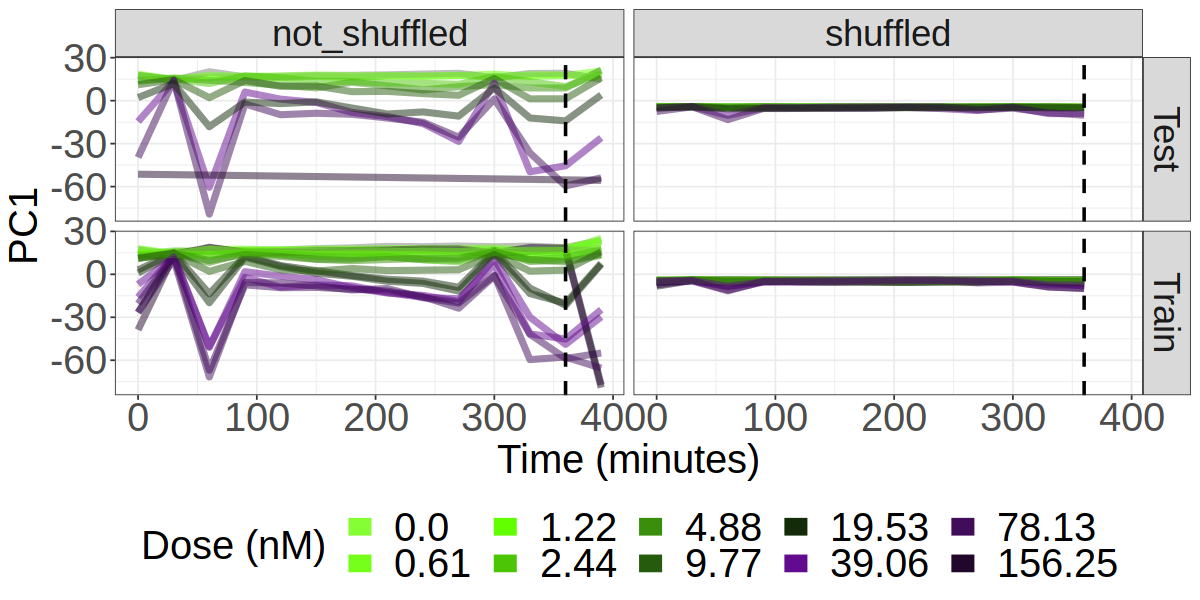

In [20]:
width <- 10
height <- 5
options(repr.plot.width=width, repr.plot.height=height)
# plot the pca
pca1_plot <- (
    ggplot(pca_df, aes(x = Metadata_Time, y = PC1, color = Metadata_dose, group = Group))
    + geom_line(aes(group = Group), alpha = 0.5, size = 2)
    + theme_minimal() 
    + facet_grid(Metadata_data_split ~ shuffled)
    + geom_vline(xintercept = (30*12), linetype = "dashed", color = "black", size = 1)
    + labs(x="Time (minutes)", y="PC1", color="Dose (nM)")
    + plot_themes
    + scale_color_manual(values = color_pallete_for_dose)
    + guides(color = guide_legend( override.aes = list(size = 5, alpha = 1)))
)
ggsave(
    filename = "../figures/predicted_PC1.png",
    plot = pca1_plot,
    width = width,
    height = height,
    dpi = 600
)
pca1_plot

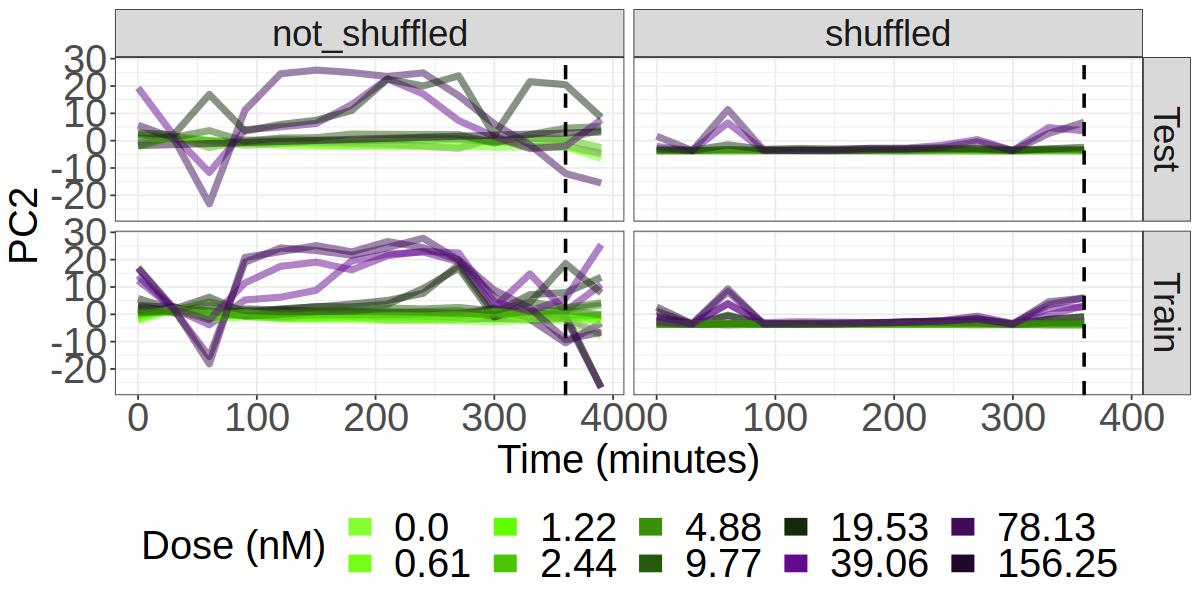

In [21]:
width <- 10
height <- 5
options(repr.plot.width=width, repr.plot.height=height)
# plot the pca
pca2_plot <- (
    ggplot(pca_df, aes(x = Metadata_Time, y = PC2, color = Metadata_dose, group = Group))
    + geom_line(aes(group = Group), alpha = 0.5, size = 2)
    + theme_minimal() 
    + facet_grid(Metadata_data_split ~ shuffled)
    + geom_vline(xintercept = (30*12), linetype = "dashed", color = "black", size = 1)
    + labs(x="Time (minutes)", y="PC2", color="Dose (nM)")
    + plot_themes
    + scale_color_manual(values = color_pallete_for_dose)
    + guides(color = guide_legend( override.aes = list(size = 5, alpha = 1)))
)
ggsave(
    filename = "../figures/predicted_PC2.png",
    plot = pca2_plot,
    width = width,
    height = height,
    dpi = 600
)
pca2_plot

In [22]:
unique(pca_df$shuffled)
unique(pca_df$Metadata_data_split)

[1] "shuffled"     "not_shuffled"

[1] "Train" "Test"

In [23]:
pca_df$Metadata_shuffle_plus_data_split <- paste0(pca_df$shuffled, "\n", pca_df$Metadata_data_split)
pca_df$Metadata_Time <- paste0(pca_df$Metadata_Time, " min.")

pca_df$Metadata_Time <- factor(
    pca_df$Metadata_Time, 
    levels = c(
        '0 min.',
        '30 min.',
        '60 min.',
        '90 min.',
        '120 min.',
        '150 min.',
        '180 min.',
        '210 min.',
        '240 min.',
        '270 min.',
        '300 min.',
        '330 min.',
        '360 min.',
        '390 min.'
    )
)
unique(pca_df$Metadata_Time)

[1] 0 min.   30 min.  60 min.  90 min.  120 min. 150 min. 180 min. 210 min.
 [9] 240 min. 270 min. 300 min. 330 min. 360 min. 390 min.
14 Levels: 0 min. 30 min. 60 min. 90 min. 120 min. 150 min. ... 390 min.

In [24]:
unique(pca_df$Metadata_shuffle_plus_data_split)

[1] "shuffled\nTrain"     "not_shuffled\nTrain" "shuffled\nTest"     
[4] "not_shuffled\nTest"

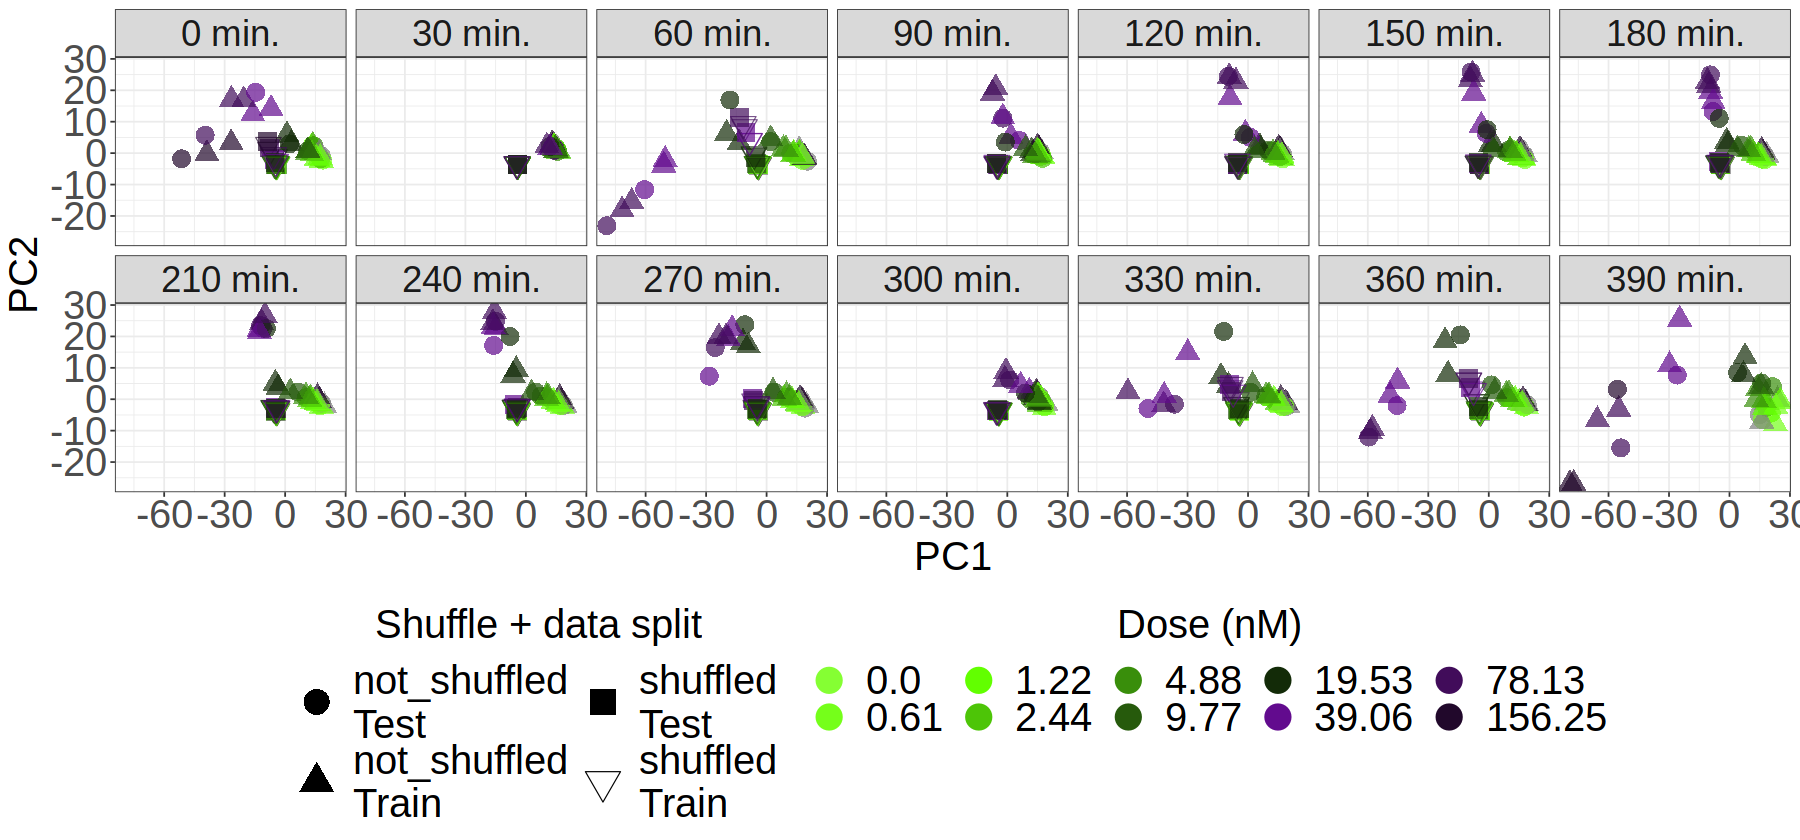

In [25]:
# plot PCA1 vs PCA2 over time
width <- 15
height <- 7
options(repr.plot.width=width, repr.plot.height=height)
pca_over_time_plot <- (
    ggplot(pca_df, aes(x = PC1, y = PC2, color = Metadata_dose))
    + geom_point(aes(shape = Metadata_shuffle_plus_data_split), size = 5, alpha = 0.7)
    + theme_minimal() 
    + facet_wrap( ~ Metadata_Time, ncol = 7)
    + labs(x="PC1", y="PC2", color="Dose (nM)")
    + plot_themes
    + scale_color_manual(values = color_pallete_for_dose)
    + scale_shape_manual(values = c(16, 17,15,6), name = "Shuffle + data split")
    
    + guides(
        color = guide_legend(
            override.aes = list(size = 7, alpha = 1),
            title.position = "top",
            title.hjust = 0.5,
            ),
        shape = guide_legend(
            override.aes = list(size = 7, alpha = 1),
            title.position = "top",
            title.hjust = 0.5,
            nrow = 2,
        )
    )

)
ggsave(
    filename = "../figures/pca_over_time.png",
    plot = pca_over_time_plot,
    width = width,
    height = height,
    dpi = 600
)
pca_over_time_plot

In [26]:

# merged_results$Metadata_dose <- gsub('0', '0.0', merged_results$Metadata_dose)
unique(merged_results$Metadata_dose)
merged_results <- merged_results %>%
  mutate(Group = Metadata_Well) %>%
  arrange(Metadata_Well, Metadata_Time)
merged_results <- merged_results %>% arrange(Group)
head(merged_results)

[1] 0      0.61   1.22   2.44   4.88   19.53  39.06  78.13  156.25 9.77  
Levels: 0 0.61 1.22 2.44 4.88 9.77 19.53 39.06 78.13 156.25

Terminal_Cytoplasm_AreaShape_Area,Terminal_Cytoplasm_AreaShape_BoundingBoxMaximum_Y,Terminal_Cytoplasm_AreaShape_Compactness,Terminal_Cytoplasm_AreaShape_Eccentricity,Terminal_Cytoplasm_AreaShape_Extent,Terminal_Cytoplasm_AreaShape_FormFactor,Terminal_Cytoplasm_AreaShape_MaximumRadius,Terminal_Cytoplasm_AreaShape_MinorAxisLength,Terminal_Cytoplasm_AreaShape_Orientation,Terminal_Cytoplasm_AreaShape_Solidity,⋯,Terminal_Nuclei_Texture_InverseDifferenceMoment_AnnexinV_3_03_256,Terminal_Nuclei_Texture_InverseDifferenceMoment_DNA_3_01_256,Terminal_Nuclei_Texture_SumAverage_AnnexinV_3_00_256,Terminal_Nuclei_Texture_SumAverage_DNA_3_00_256,Metadata_Well,Metadata_Time,Metadata_dose,shuffled,Metadata_data_split,Group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>,<chr>,<chr>
-0.9730961,0.02032410,-0.5943986,-0.32241936,0.70577790,0.75604516,-0.50864146,-0.5533573983,-0.01983514,0.7206710,⋯,0.3708646,0.4704031,-0.04137367,0.9105390,C-02,0,0,shuffled,Train,C-02
-0.2673252,-0.01470262,-0.4123003,0.09034611,0.16660349,0.09285172,-0.02321996,-0.0218079309,0.06338036,0.3433944,⋯,0.3748781,0.4728378,-0.08377590,0.3598401,C-02,0,0,not_shuffled,Train,C-02
-0.9781250,0.01856642,-0.6035323,-0.32241936,0.70307620,0.75819787,-0.48798015,-0.5521423712,-0.01983514,0.7079729,⋯,0.3708646,0.4772829,-0.04137367,0.9105390,C-02,30,0,shuffled,Train,C-02
-0.1874934,-0.01470262,-0.3349248,0.18521358,0.05580289,-0.03392112,0.01182070,-0.0008317357,0.06303971,0.2400063,⋯,0.3716138,0.4672940,-0.08342226,0.3668827,C-02,30,0,not_shuffled,Train,C-02
-0.9775425,0.02121906,-0.6079075,-0.32241936,0.70239881,0.75777746,-0.48526439,-0.5522569557,-0.01983514,0.7103335,⋯,0.3708646,0.4778063,-0.04137367,0.9105390,C-02,60,0,shuffled,Train,C-02
-0.1581330,-0.01470262,-0.3151052,0.21696809,0.03615990,-0.07189955,0.01521258,-0.0059499877,0.06417604,0.2123569,⋯,0.3769331,0.4696236,-0.08390648,0.3606797,C-02,60,0,not_shuffled,Train,C-02


In [27]:
# get all column names that contain Intensity
colnames(merged_results)[grepl("Intensity", colnames(merged_results))]

[1] "Terminal_Cytoplasm_Intensity_IntegratedIntensityEdge_DNA" 
 [2] "Terminal_Cytoplasm_Intensity_IntegratedIntensity_AnnexinV"
 [3] "Terminal_Cytoplasm_Intensity_IntegratedIntensity_DNA"     
 [4] "Terminal_Cytoplasm_Intensity_MADIntensity_AnnexinV"       
 [5] "Terminal_Cytoplasm_Intensity_MassDisplacement_AnnexinV"   
 [6] "Terminal_Cytoplasm_Intensity_MassDisplacement_DNA"        
 [7] "Terminal_Cytoplasm_Intensity_MaxIntensityEdge_AnnexinV"   
 [8] "Terminal_Cytoplasm_Intensity_MaxIntensityEdge_DNA"        
 [9] "Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV"       
[10] "Terminal_Cytoplasm_Intensity_MaxIntensity_DNA"            
[11] "Terminal_Cytoplasm_Intensity_MeanIntensityEdge_DNA"       
[12] "Terminal_Cytoplasm_Intensity_StdIntensity_DNA"            
[13] "Terminal_Cytoplasm_Intensity_UpperQuartileIntensity_DNA"  
[14] "Terminal_Cells_Intensity_IntegratedIntensityEdge_AnnexinV"
[15] "Terminal_Cells_Intensity_IntegratedIntensityEdge_DNA"     
[16] "Terminal_Cells_Intensity_IntegratedIntensity_DNA"         
[17] "Terminal_Cells_Intensity_LowerQuartileIntensity_DNA"      
[18] "Terminal_Cells_Intensity_MADIntensity_DNA"                
[19] "Terminal_Cells_Intensity_MassDisplacement_DNA"            
[20] "Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV"       
[21] "Terminal_Cells_Intensity_MaxIntensityEdge_DNA"            
[22] "Terminal_Cells_Intensity_MaxIntensity_DNA"                
[23] "Terminal_Cells_Intensity_MeanIntensityEdge_DNA"           
[24] "Terminal_Cells_Intensity_MedianIntensity_DNA"             
[25] "Terminal_Cells_Intensity_StdIntensity_DNA"                
[26] "Terminal_Cells_Intensity_UpperQuartileIntensity_DNA"      
[27] "Terminal_Nuclei_Intensity_IntegratedIntensityEdge_DNA"    
[28] "Terminal_Nuclei_Intensity_IntegratedIntensity_AnnexinV"   
[29] "Terminal_Nuclei_Intensity_IntegratedIntensity_DNA"        
[30] "Terminal_Nuclei_Intensity_LowerQuartileIntensity_AnnexinV"
[31] "Terminal_Nuclei_Intensity_LowerQuartileIntensity_DNA"     
[32] "Terminal_Nuclei_Intensity_MADIntensity_AnnexinV"          
[33] "Terminal_Nuclei_Intensity_MassDisplacement_AnnexinV"      
[34] "Terminal_Nuclei_Intensity_MassDisplacement_DNA"           
[35] "Terminal_Nuclei_Intensity_MaxIntensityEdge_AnnexinV"      
[36] "Terminal_Nuclei_Intensity_MaxIntensity_AnnexinV"          
[37] "Terminal_Nuclei_Intensity_MaxIntensity_DNA"               
[38] "Terminal_Nuclei_Intensity_MeanIntensityEdge_DNA"          
[39] "Terminal_Nuclei_Intensity_MedianIntensity_DNA"            
[40] "Terminal_Nuclei_Intensity_StdIntensityEdge_DNA"

In [28]:
# single feature predictions
Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV_path <- file.path(
    "../results/Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV.parquet"
)
Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV_path <- file.path(
    "../results/Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV.parquet"
)
Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV <- arrow::read_parquet(Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV_path)
Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV <- arrow::read_parquet(Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV_path)

In [29]:
metadata_columns <- c("Metadata_Time", "Metadata_dose", "Metadata_Well", "shuffled", "Metadata_data_split")

In [30]:
subset_results_Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV <- subset_results[, colnames(subset_results) %in% c("Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV", metadata_columns)]
subset_results_Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV <- subset_results[, colnames(subset_results) %in% c("Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV", metadata_columns)]

Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV <- Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV[, colnames(Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV) %in% c("Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV", metadata_columns)]
Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV <- Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV[, colnames(Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV) %in% c("Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV", metadata_columns)]

dim(subset_results_Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV)
dim(subset_results_Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV)
dim(Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV)
dim(Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV)
# merge the two dataframes on the columns "Metadata_Time" and "Metadata_dose" Metadata_Well
# merged_mean_annexinV_predictions <- rbind(subset_results_mean_annexinV, mean_annexinV_predictions )
# merged_max_annexinV_predictions <- rbind(subset_results_max_annexinV, max_annexinV_predictions )



[1] 730   5

[1] 730   5

[1] 730   6

[1] 730   6

In [31]:

# merged_max_annexinV_predictions$Metadata_Time <- as.numeric(merged_max_annexinV_predictions$Metadata_Time) * 30
# merged_mean_annexinV_predictions$Metadata_Time <- as.numeric(merged_mean_annexinV_predictions$Metadata_Time) * 30
# merged_max_annexinV_predictions$shuffled <- gsub("TRUE", "Shuffled", merged_max_annexinV_predictions$shuffled)
# merged_results$shuffled <- gsub("TRUE", "Shuffled", merged_results$shuffled)
# merged_results$shuffled <- gsub("FALSE", "Not shuffled", merged_results$shuffled)
Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV$Metadata_dose <- as.numeric(Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV$Metadata_dose)
Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV$Metadata_dose <- factor(
    Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV$Metadata_dose, 
    levels = c(
        '0',
        '0.61',
        '1.22',
        '2.44',
        '4.88',
        '9.77',
        '19.53',
        '39.06',
        '78.13',
        '156.25'
    )
)
Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV$Metadata_dose <- as.numeric(Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV$Metadata_dose)
Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV$Metadata_dose <- factor(
    Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV$Metadata_dose, 
    levels = c(
        '0',
        '0.61', 
        '1.22',
        '2.44',
        '4.88',
        '9.77',
        '19.53',
        '39.06',
        '78.13',
        '156.25'
    )
)
dim(merged_results)


[1] 759 523

In [32]:
head(subset_results_Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV)

# merged_results$Metadata_dose <- gsub('0', '0.0', merged_results$Metadata_dose)
unique(subset_results_Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV$Metadata_dose)
subset_results_Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV <- subset_results_Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV %>%
  mutate(Group = Metadata_Well) %>%
  arrange(Metadata_Well, Metadata_Time)
subset_results_Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV <- subset_results_Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV %>% arrange(Group)
subset_results_Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV$Metadata_Time <- as.numeric(subset_results_Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV$Metadata_Time) * 30
head(subset_results_Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV)
subset_results_Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV <- subset_results_Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV %>%
  mutate(Group = Metadata_Well) %>%
  arrange(Metadata_Well, Metadata_Time)
subset_results_Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV <- subset_results_Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV %>% arrange(Group)
subset_results_Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV$Metadata_Time <- as.numeric(subset_results_Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV$Metadata_Time) * 30
head(subset_results_Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV)
# add the data split
subset_results_Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV <- subset_results_Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV %>%
  left_join(train_test_df, by = "Metadata_Well")
subset_results_Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV <- subset_results_Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV %>%
  left_join(train_test_df, by = "Metadata_Well")
head(subset_results_Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV)
head(subset_results_Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV)

Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV,Metadata_Well,Metadata_Time,Metadata_dose,shuffled
<dbl>,<chr>,<dbl>,<chr>,<chr>
-0.2680204,C-02,0,0.0,shuffled
-0.2680204,C-02,1,0.0,shuffled
-0.2680204,C-02,10,0.0,shuffled
-0.2680204,C-02,11,0.0,shuffled
-0.2680204,C-02,12,0.0,shuffled
-0.2680204,C-02,2,0.0,shuffled


[1] "0.0"    "0.61"   "1.22"   "2.44"   "4.88"   "19.53"  "39.06"  "78.13" 
 [9] "156.25" "9.77"

Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV,Metadata_Well,Metadata_Time,Metadata_dose,shuffled,Group
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
-0.2680204,C-02,0,0.0,shuffled,C-02
-0.2827423,C-02,0,0.0,not_shuffled,C-02
-0.2680204,C-02,30,0.0,shuffled,C-02
-0.2668667,C-02,30,0.0,not_shuffled,C-02
-0.2680204,C-02,60,0.0,shuffled,C-02
-0.2730582,C-02,60,0.0,not_shuffled,C-02


Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV,Metadata_Well,Metadata_Time,Metadata_dose,shuffled,Group
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
-0.01614519,C-02,0,0.0,shuffled,C-02
-0.14282110,C-02,0,0.0,not_shuffled,C-02
-0.01211123,C-02,30,0.0,shuffled,C-02
-0.15213822,C-02,30,0.0,not_shuffled,C-02
-0.01333186,C-02,60,0.0,shuffled,C-02
-0.17226047,C-02,60,0.0,not_shuffled,C-02


Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV,Metadata_Well,Metadata_Time,Metadata_dose,shuffled,Group,Metadata_data_split
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
-0.2680204,C-02,0,0.0,shuffled,C-02,non_Trained_pair
-0.2827423,C-02,0,0.0,not_shuffled,C-02,non_Trained_pair
-0.2680204,C-02,30,0.0,shuffled,C-02,non_Trained_pair
-0.2668667,C-02,30,0.0,not_shuffled,C-02,non_Trained_pair
-0.2680204,C-02,60,0.0,shuffled,C-02,non_Trained_pair
-0.2730582,C-02,60,0.0,not_shuffled,C-02,non_Trained_pair


Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV,Metadata_Well,Metadata_Time,Metadata_dose,shuffled,Group,Metadata_data_split
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
-0.01614519,C-02,0,0.0,shuffled,C-02,non_Trained_pair
-0.14282110,C-02,0,0.0,not_shuffled,C-02,non_Trained_pair
-0.01211123,C-02,30,0.0,shuffled,C-02,non_Trained_pair
-0.15213822,C-02,30,0.0,not_shuffled,C-02,non_Trained_pair
-0.01333186,C-02,60,0.0,shuffled,C-02,non_Trained_pair
-0.17226047,C-02,60,0.0,not_shuffled,C-02,non_Trained_pair


In [33]:
subset_results_Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV <- subset_results_Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV %>%
  mutate(Metadata_data_split = gsub("non_trained_pair", "train", Metadata_data_split))
subset_results_Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV <- subset_results_Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV %>%
  mutate(Metadata_data_split = gsub("non_trained_pair", "train", Metadata_data_split))

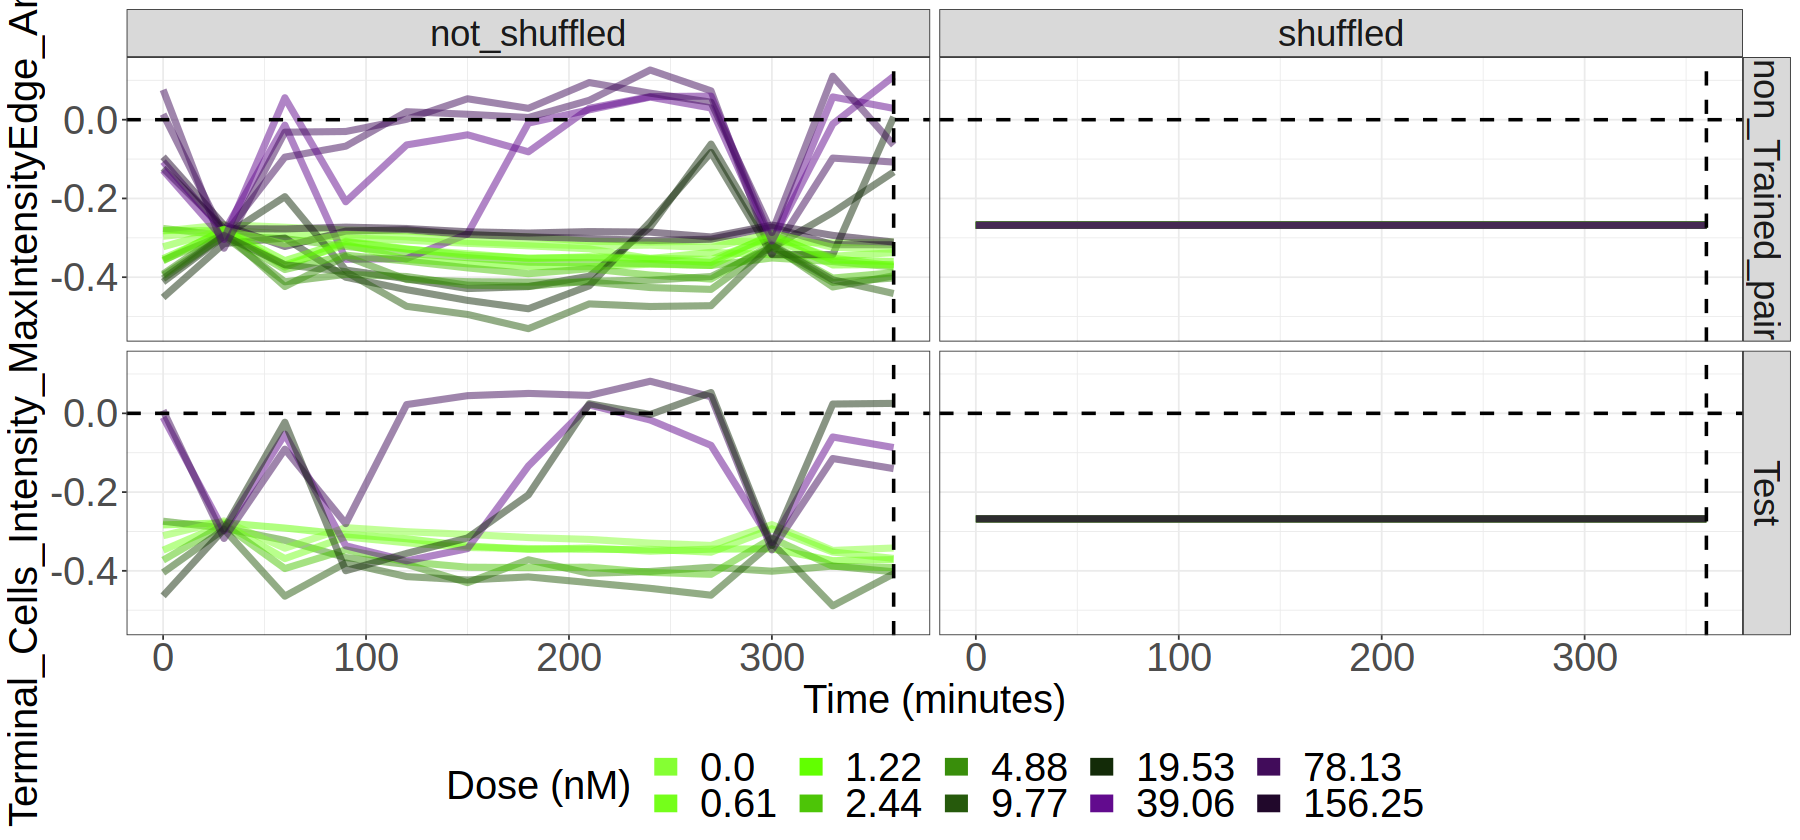

In [34]:
# plot the pca
feature_plot <- (
    ggplot(subset_results_Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV, aes(x = Metadata_Time, y = Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV, color = Metadata_dose, group = Group))
    + geom_line(aes(group = Group), alpha = 0.5, size = 2)
    + theme_minimal() 
    + facet_grid(Metadata_data_split ~ shuffled)

    + geom_vline(xintercept = (30*12), linetype = "dashed", color = "black", size = 1)
    + geom_hline(yintercept = 0, linetype = "dashed", color = "black", size = 1)

    + labs(x="Time (minutes)", y="Terminal_Cells_Intensity_MaxIntensityEdge_AnnexinV", color="Dose (nM)")
    + plot_themes
    + scale_color_manual(values = color_pallete_for_dose)
    + guides(color = guide_legend( override.aes = list(size = 5, alpha = 1)))


)
ggsave(
    filename = "../figures/predicted_single_feature_mean_annexinV_predictions.png",
    plot = feature_plot,
    width = width,
    height = height,
    dpi = 600
)
feature_plot

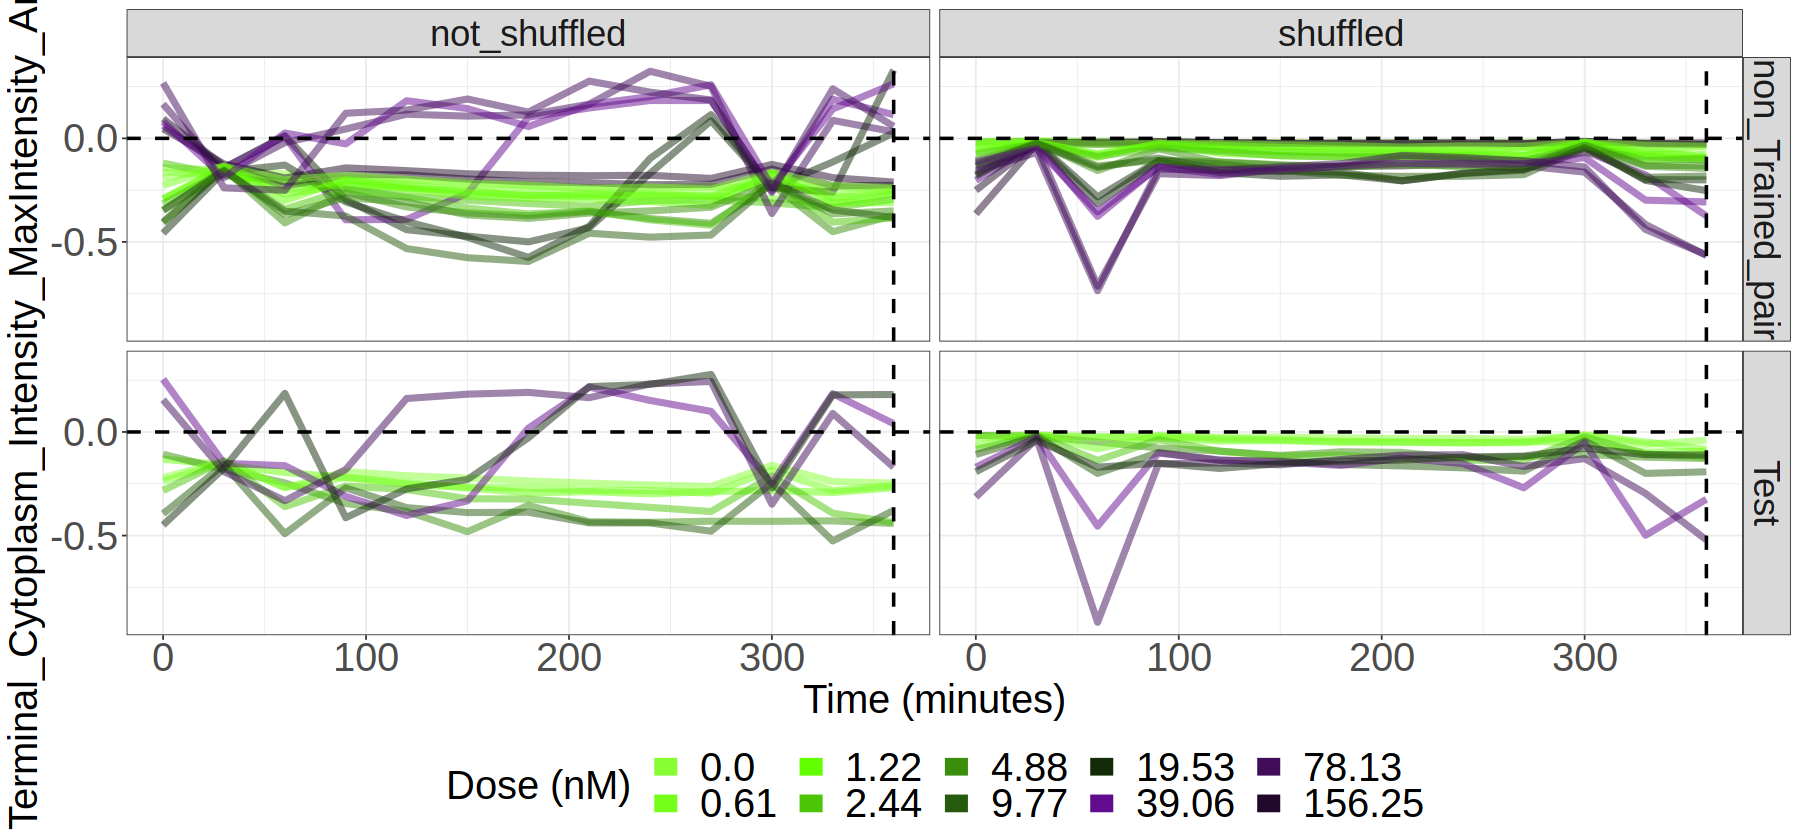

In [35]:
# plot the pca
feature_plot <- (
    ggplot(subset_results_Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV, aes(x = Metadata_Time, y = Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV, color = Metadata_dose, group = Group))
    + geom_line(aes(group = Group), alpha = 0.5, size = 2)
    + theme_minimal() 
    + facet_grid(Metadata_data_split ~ shuffled)

    + geom_vline(xintercept = (30*12), linetype = "dashed", color = "black", size = 1)
    + geom_hline(yintercept = 0, linetype = "dashed", color = "black", size = 1)

    + labs(x="Time (minutes)", y="Terminal_Cytoplasm_Intensity_MaxIntensity_AnnexinV", color="Dose (nM)")
    + plot_themes
    + scale_color_manual(values = color_pallete_for_dose)
    + guides(color = guide_legend( override.aes = list(size = 5, alpha = 1)))


)
ggsave(
    filename = "../figures/predicted_single_feature_mean_annexinV_predictions.png",
    plot = feature_plot,
    width = width,
    height = height,
    dpi = 600
)
feature_plot

### Patchwork for a final figure

In [36]:
feature_plot <- feature_plot + theme(legend.position = "none")
pca1_plot <- pca1_plot + theme(legend.position = "none")

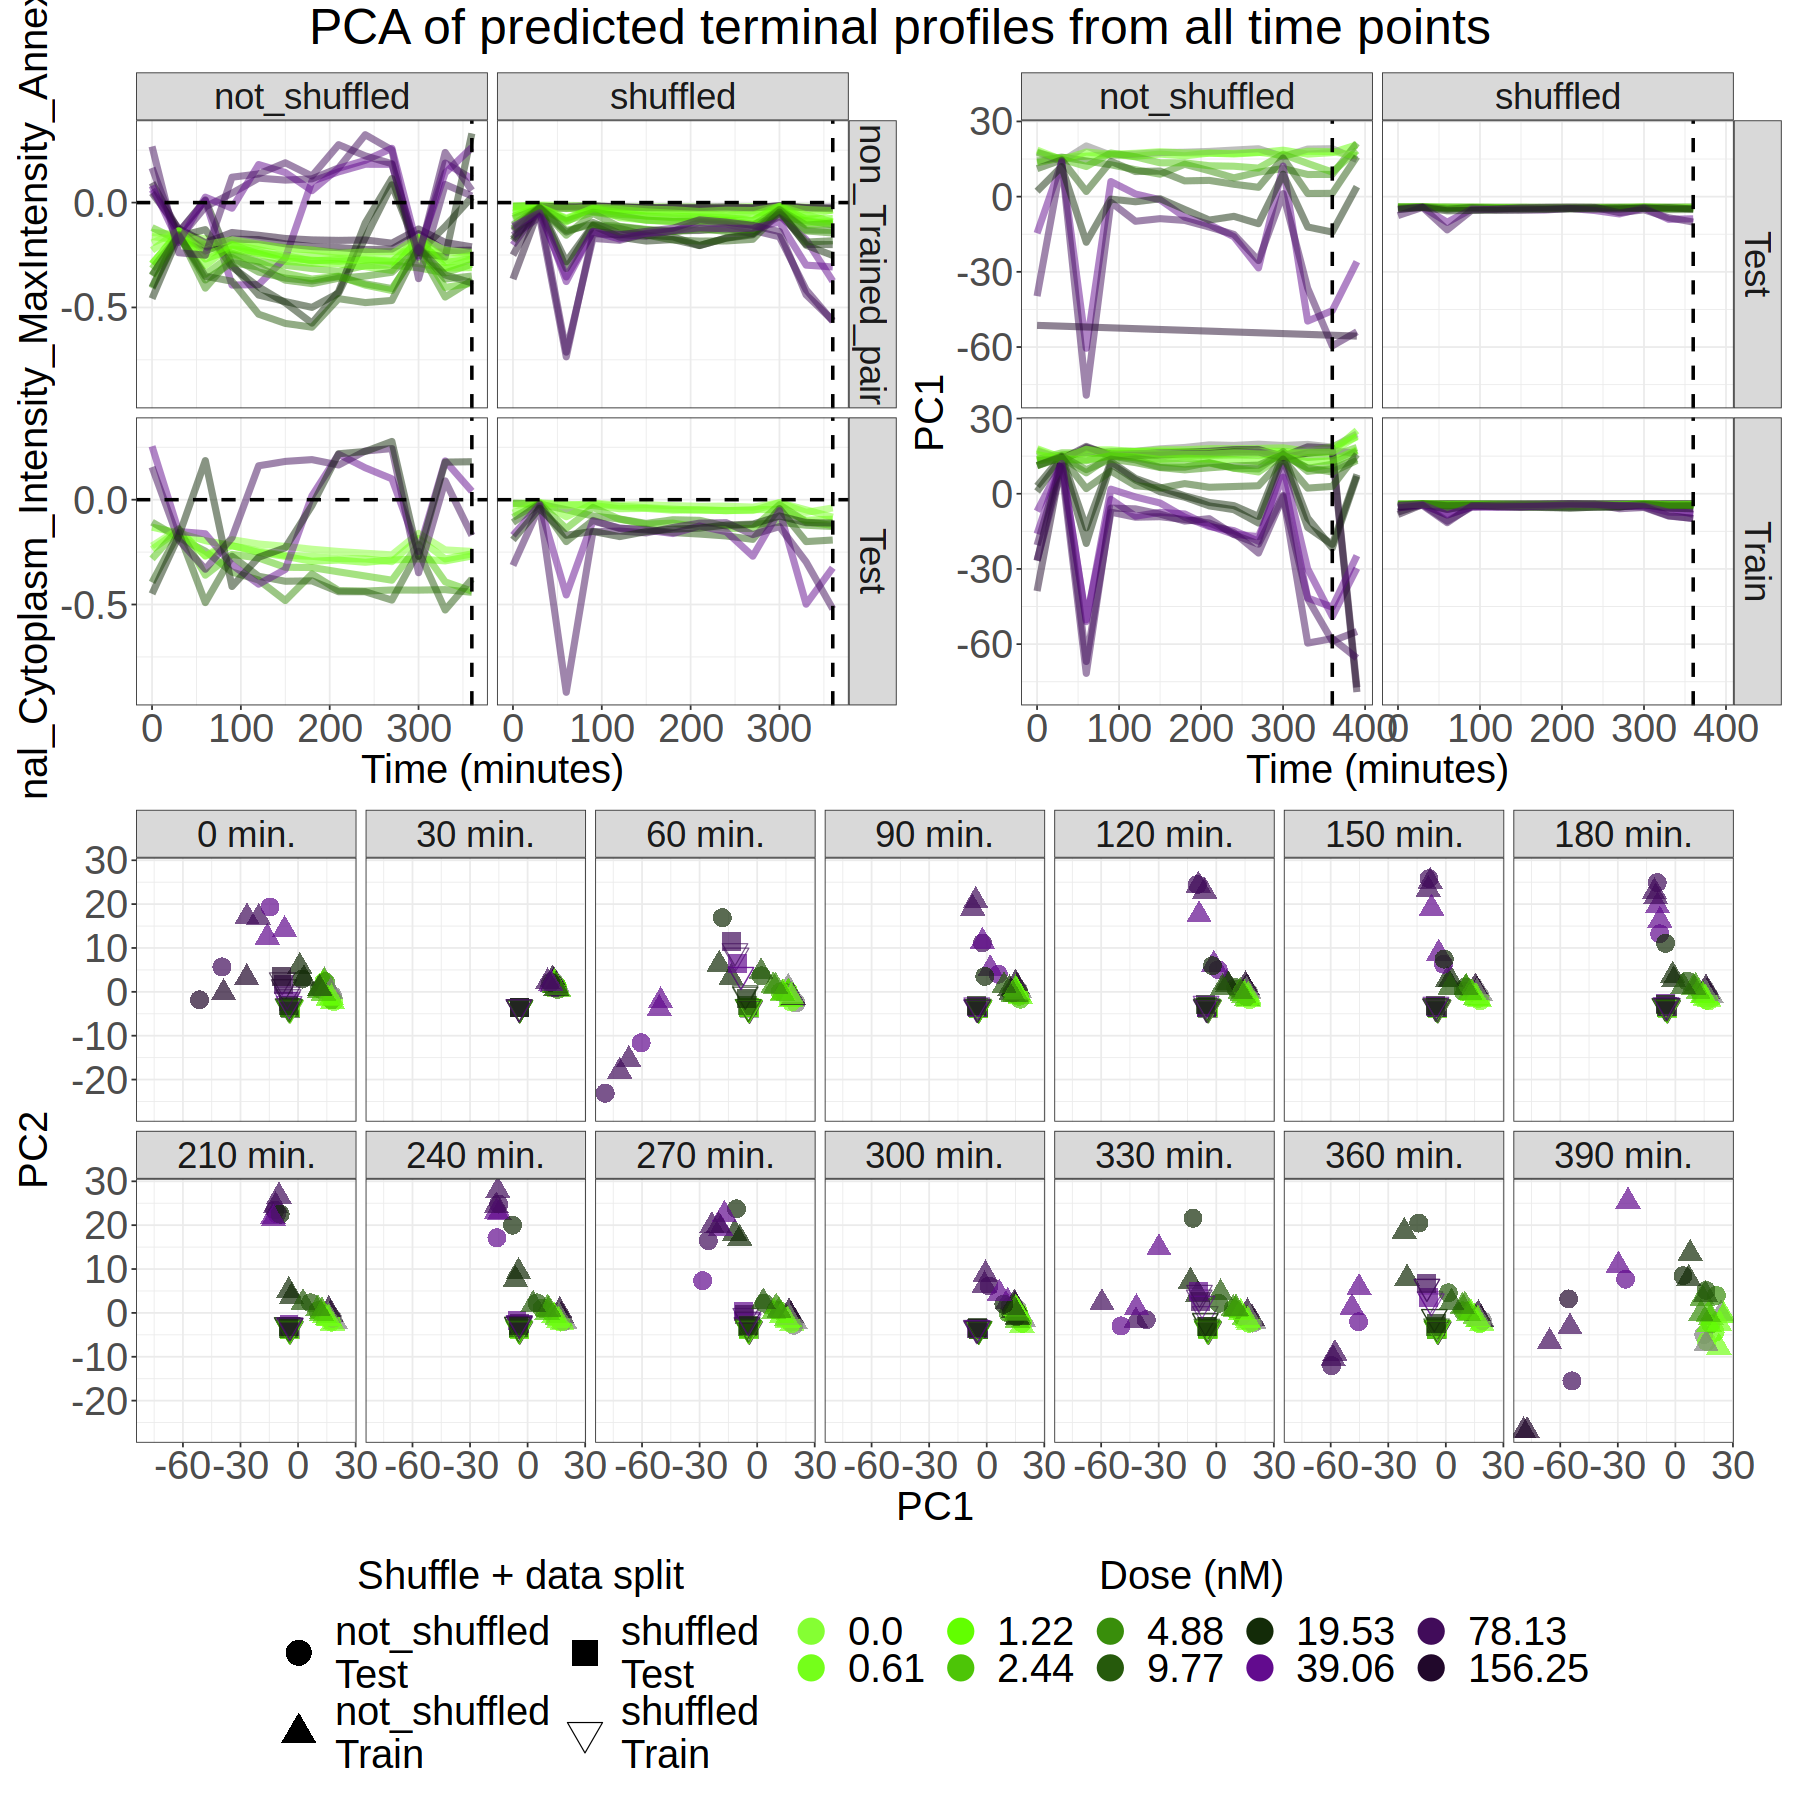

In [37]:
layout <- "
AABB
CCCC
"
height <- 15
width <- 15
options(repr.plot.width=width, repr.plot.height=height)
final_plot <- (
    feature_plot 
    + pca1_plot 
    + pca_over_time_plot
    + plot_layout(design = layout)
    + plot_annotation(
        title = "PCA of predicted terminal profiles from all time points",
        theme = theme(plot.title = element_text(size = 30, hjust = 0.5))
    )
)
ggsave(
    filename = "../figures/final_predicted_terminal_profiles_from_all_time_points.png",
    plot = final_plot,
    width = width,
    height = height,
    dpi = 600
)
final_plot